In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [ ]:
from PIL import Image
import numpy as np
import os

# Dataset Loading & Model Building

In [3]:
# Load A–Z alphabet dataset
df = pd.read_csv('/content/balanced_mnist_az.csv').astype('float32')

# Separate back into x and y, and reshape x to (28, 28)
x = df.drop('label', axis=1).values.reshape(-1, 28, 28)
y = df['label'].values

# Shuffle the balanced dataset
x, y = shuffle(x, y, random_state=42)

# Final check
print(f"Balanced x shape: {x.shape}, y shape: {y.shape}")
print("Label frequencies in balanced dataset:")
print(pd.Series(y).value_counts().sort_index())

Balanced x shape: (40320, 28, 28), y shape: (40320,)
Label frequencies in balanced dataset:
0.0     1120
1.0     1120
2.0     1120
3.0     1120
4.0     1120
5.0     1120
6.0     1120
7.0     1120
8.0     1120
9.0     1120
10.0    1120
11.0    1120
12.0    1120
13.0    1120
14.0    1120
15.0    1120
16.0    1120
17.0    1120
18.0    1120
19.0    1120
20.0    1120
21.0    1120
22.0    1120
23.0    1120
24.0    1120
25.0    1120
26.0    1120
27.0    1120
28.0    1120
29.0    1120
30.0    1120
31.0    1120
32.0    1120
33.0    1120
34.0    1120
35.0    1120
Name: count, dtype: int64


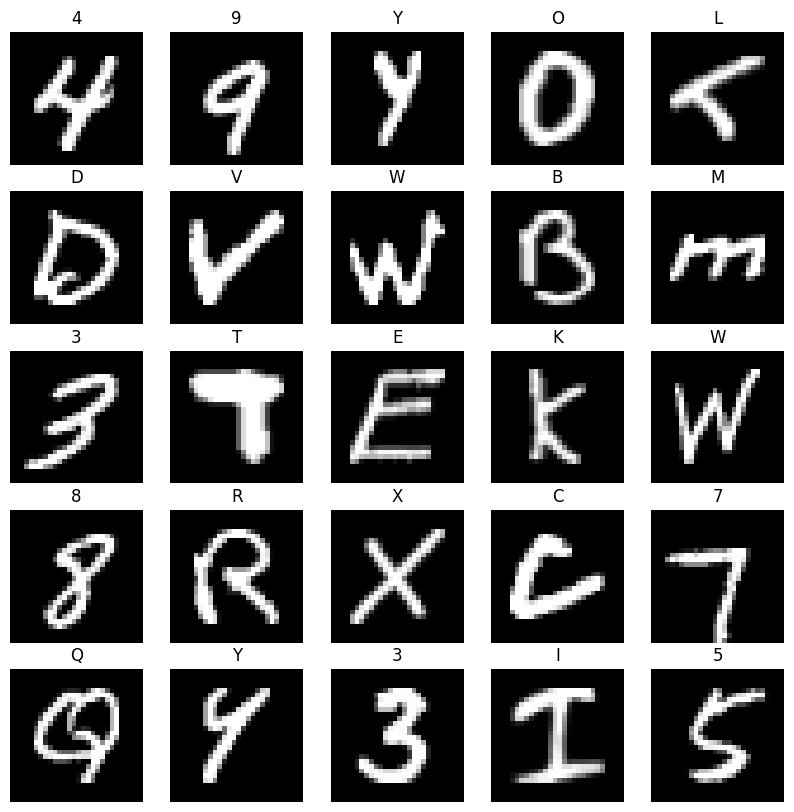

In [8]:
num_samples = 25  # For 5x5 grid
indices = np.random.choice(len(x), size=num_samples, replace=False)


plt.figure(figsize=(10, 10))
for i, idx in enumerate(indices):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x[idx], cmap='gray')

    # Show label: digits (0–9) or letters (10–35)
    label = y[idx]
    if label < 10:
        title = str(int(label))
    else:
        title = chr(ord('A') + int(label) - 10)

    plt.title(title)
    plt.axis('off')

In [10]:
# shuffle and split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

x_train.shape, y_train.shape

((32256, 28, 28), (32256,))

In [11]:
# Add channel dimension (batch_size, height, width, channels)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

print(f"Final shapes → x_train: {x_train.shape}, y_train: {y_train.shape}")

Final shapes → x_train: (32256, 28, 28, 1), y_train: (32256,)


In [12]:
label_map = {}

# Add digit labels 0–9
for i in range(10):
    label_map[i] = str(i)  # 0: '0', 1: '1', ..., 9: '9'

# Add letter labels 10–35 → 'A' to 'Z'
for i in range(26):
    label_map[i + 10] = chr(ord('A') + i)  # 10: 'A', 11: 'B', ..., 35: 'Z'

In [13]:
label_map

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z'}

In [14]:
x_train.shape, y_train.shape

((32256, 28, 28, 1), (32256,))

In [15]:
x_test.shape, y_test.shape

((8064, 28, 28, 1), (8064,))

In [16]:
# Flatten the 28x28 images and output 36 class probabilities
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),          # Input layer for grayscale images
    layers.Flatten(),                         # Flatten to 784 (28x28)
    layers.Dense(36, activation='softmax')    # Output layer for 36 classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',   # Use integer labels
    metrics=['accuracy']
)

# Show model structure
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 36)                  │          28,260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,260 (110.39 KB)

 Trainable params: 28,260 (110.39 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=100,
    batch_size=128
)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\n Test Accuracy: {test_accuracy:.4f}")

# Get final training accuracy
train_accuracy = history.history['accuracy'][-1]
print(f" Final Training Accuracy: {train_accuracy:.4f}")

Epoch 1/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4451 - loss: 2.4041 - val_accuracy: 0.7313 - val_loss: 1.1365
Epoch 2/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7565 - loss: 1.0270 - val_accuracy: 0.7721 - val_loss: 0.8994
Epoch 3/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7927 - loss: 0.8417 - val_accuracy: 0.7933 - val_loss: 0.8058
Epoch 4/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8084 - loss: 0.7496 - val_accuracy: 0.8025 - val_loss: 0.7543
Epoch 5/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8164 - loss: 0.7161 - val_accuracy: 0.8080 - val_loss: 0.7217
Epoch 6/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8262 - loss: 0.6736 - val_accuracy: 0.8145 - val_loss: 0.6995
Epoch 7/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8318 - loss: 0.6483 - val_accuracy: 0.8158 - val_loss: 0.6819
Epoch 8/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8348 - loss: 0.6306 - val_acc

In [19]:
model.save('handwritten_model_epoch100.keras')

In [20]:
# from tensorflow import keras  # or `import keras` (Keras 3 standalone)

# # Load the model
# loaded_model = keras.models.load_model('handwritten_model_epoch100.keras')

# # Verify the architecture
# loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 36)                  │          28,260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84,782 (331.18 KB)

 Trainable params: 28,260 (110.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 56,522 (220.79 KB)

In [21]:
# Evaluate on test data
# test_loss, test_accuracy = loaded_model.evaluate(x_test, y_test)
# print(f"Test Accuracy (Loaded Model): {test_accuracy:.4f}")

252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8341 - loss: 0.6491
Test Accuracy (Loaded Model): 0.8316


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


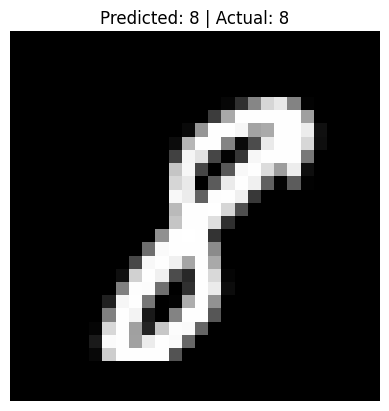

In [25]:
# Define the label map (if you don't already have it)
label_map = {i: str(i) for i in range(10)}  # 0–9
label_map.update({i + 10: chr(ord('A') + i) for i in range(26)})  # 10–35 → A–Z

# Pick one image from the test set
index = np.random.randint(len(x_test))  # Random index
img = x_test[index]
true_label = y_test[index]

# Predict (model expects batch input → add extra dimension)
prediction = model.predict(np.expand_dims(img, axis=0))
predicted_label = np.argmax(prediction)


# Plot the image
plt.imshow(img.squeeze(), cmap='gray')
plt.title(f"Predicted: {label_map[predicted_label]} | Actual: {label_map[int(true_label)]}")
plt.axis('off')
plt.show()

# Using Custom Dataset

In [26]:
image_folder = '/content/images'
processed_images = []

for filename in os.listdir(image_folder):
    if filename.lower().endswith('.jpg'):
        img_path = os.path.join(image_folder, filename)

        # Load and convert to grayscale
        img = Image.open(img_path).convert('L')

        # Resize to 28x28
        img_resized = img.resize((28, 28))

        # Convert to NumPy array and normalize
        img_array = np.array(img_resized).astype('float32') / 255.0

        # Invert the pixel values (white → black, black → white)
        img_array = 1.0 - img_array

        # Add channel dimension
        img_array = np.expand_dims(img_array, axis=-1)

        processed_images.append(img_array)

x_images = np.array(processed_images)
print(f"Processed {len(x_images)} images. Shape: {x_images.shape}")

Processed 13 images. Shape: (13, 28, 28, 1)


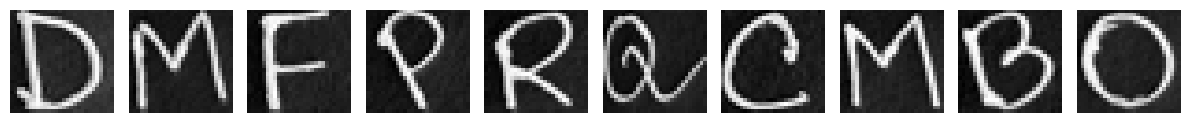

In [27]:
# Plot the first 10 images
plt.figure(figsize=(12, 2))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_images[i].squeeze(), cmap='gray')  # .squeeze() removes the extra channel
    plt.axis('off')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


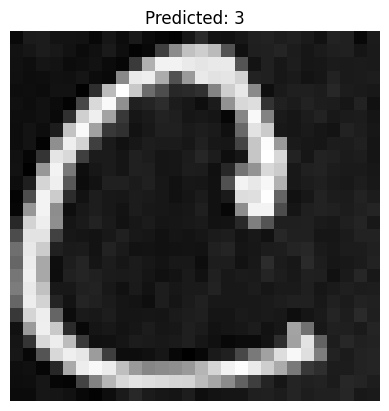

In [30]:
# Define the label map (if you don't already have it)
label_map = {i: str(i) for i in range(10)}  # 0–9
label_map.update({i + 10: chr(ord('A') + i) for i in range(26)})  # 10–35 → A–Z

# Pick one image from the test set
img = x_images[6]

# Predict (model expects batch input → add extra dimension)
prediction = model.predict(np.expand_dims(img, axis=0))
predicted_label = np.argmax(prediction)

# Plot the image
plt.imshow(img.squeeze(), cmap='gray')
plt.title(f"Predicted: {label_map[predicted_label]}")
plt.axis('off')
plt.show()

# Letter Seperation from Word & Prediction

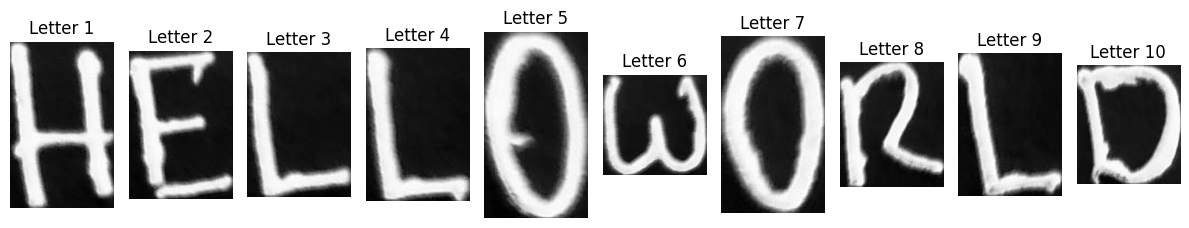

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image (white bg, black text)
image = cv2.imread('/content/words/WhatsApp Image 2025-06-21 at 5.48.28 PM.jpeg', cv2.IMREAD_GRAYSCALE)

# 1. INVERT to get black bg + white text (required for contour detection)
inverted = cv2.bitwise_not(image)  # Now black bg, white text

# 2. Threshold to ensure pure b/w
_, binary = cv2.threshold(inverted, 128, 255, cv2.THRESH_BINARY)

# 3. Improve separation (morphological opening)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
processed = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

# 4. Find and filter contours
contours, _ = cv2.findContours(processed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])  # Sort L-R

# 5. Extract letters with minimum width/height requirements
letters = []
min_width, min_height = 10, 20  # Adjust based on expected letter size

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if w >= min_width and h >= min_height:  # Filter small noise
        letter = inverted[y:y+h, x:x+w]  # Extract from inverted image
        letters.append(letter)

# 6. Visualize results
plt.figure(figsize=(12, 3))
for i, letter in enumerate(letters):
    plt.subplot(1, len(letters), i+1)
    plt.imshow(letter, cmap='gray')
    plt.axis('off')
    plt.title(f'Letter {i+1}')
plt.tight_layout()
plt.show()

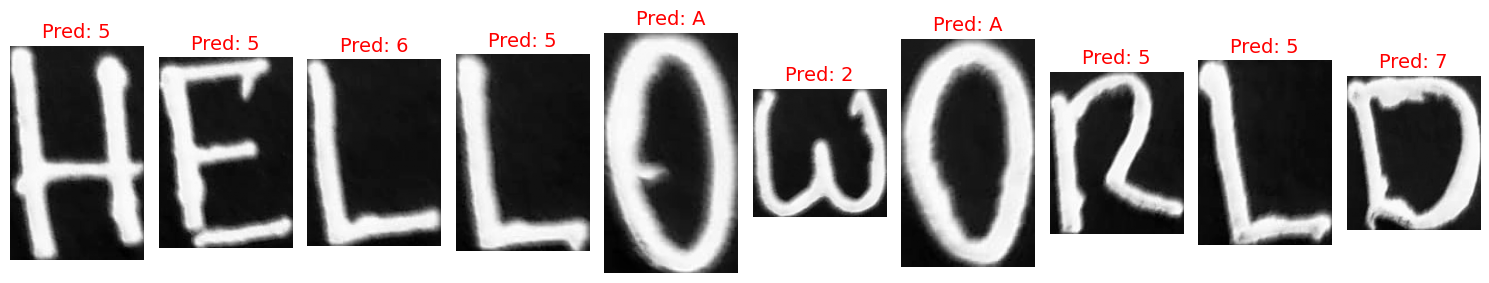


Recognized word: 5565A2A557


In [53]:
# 2. Preprocess extracted letters for prediction
def preprocess_letter(letter_img):
    # Resize to match model input (28x28)
    resized = cv2.resize(letter_img, (28, 28), interpolation=cv2.INTER_AREA)

    # Normalize and invert if needed (model expects white-on-black)
    normalized = 255 - resized  # Invert if your model was trained this way
    normalized = normalized.astype('float32') / 255.0
    return normalized.reshape(1, 28, 28, 1)  # Add batch and channel dims

# 3. Predict each letter
predictions = []
for i, letter in enumerate(letters):
    # Preprocess
    processed_letter = preprocess_letter(letter)

    # Predict
    pred = model.predict(processed_letter, verbose=0)
    pred_class = np.argmax(pred)

    # Convert to A-Z (10-35) or 0-9
    if pred_class < 10:
        pred_label = str(pred_class)
    else:
        pred_label = chr(ord('A') + pred_class - 10)

    predictions.append((letter, pred_label))

# 4. Visualize predictions
plt.figure(figsize=(15, 3))
for i, (letter, pred) in enumerate(predictions):
    plt.subplot(1, len(predictions), i+1)
    plt.imshow(letter, cmap='gray')
    plt.title(f'Pred: {pred}', color='red', fontsize=14)
    plt.axis('off')
plt.tight_layout()
plt.show()

# 5. Print the full word
full_word = ''.join([pred for (_, pred) in predictions])
print(f"\nRecognized word: {full_word}")